In [ ]:
from transformers import TFBertForSequenceClassification, BertTokenizer
import tensorflow as tf
import pandas as pd

# Load the pre-trained BERT model and tokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Assuming binary classification

# Example DataFrame
df=pd.read_csv('/content/drive/MyDrive/AI_text Detection/Training_Essay_Data.csv')
df=df.iloc[:1000,:]

# Tokenize the text
def encode(texts, tokenizer, max_length=128):
    return tokenizer(texts, truncation=True, padding=True, max_length=max_length, return_tensors="tf")

X = encode(df['text'].tolist(), tokenizer)
y = tf.convert_to_tensor(df['labels'].values)

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
dataset = dataset.shuffle(len(df)).batch(256)

# Define optimizer, loss, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model
epochs = 10
history = model.fit(dataset, epochs=epochs)

# Save the trained model)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
4/4 [==============================] - 173s 31s/step - loss: 0.6631 - accuracy: 0.6210
Epoch 2/10
4/4 [==============================] - 127s 31s/step - loss: 0.5650 - accuracy: 0.7490
Epoch 3/10
4/4 [==============================] - 127s 32s/step - loss: 0.5223 - accuracy: 0.7490
Epoch 4/10
4/4 [==============================] - 127s 32s/step - loss: 0.4554 - accuracy: 0.7490
Epoch 5/10
4/4 [==============================] - 127s 31s/step - loss: 0.3167 - accuracy: 0.8200
Epoch 6/10
4/4 [==============================] - 128s 32s/step - loss: 0.1960 - accuracy: 0.9810
Epoch 7/10
4/4 [==============================] - 127s 32s/step - loss: 0.1117 - accuracy: 0.9990
Epoch 8/10
4/4 [==============================] - 127s 32s/step - loss: 0.0666 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 128s 32s/step - loss: 0.0392 - accuracy: 0.9990
Epoch 10/10
4/4 [==============================] - 127s 32s/step - loss: 0.0214 - accuracy: 1.0000


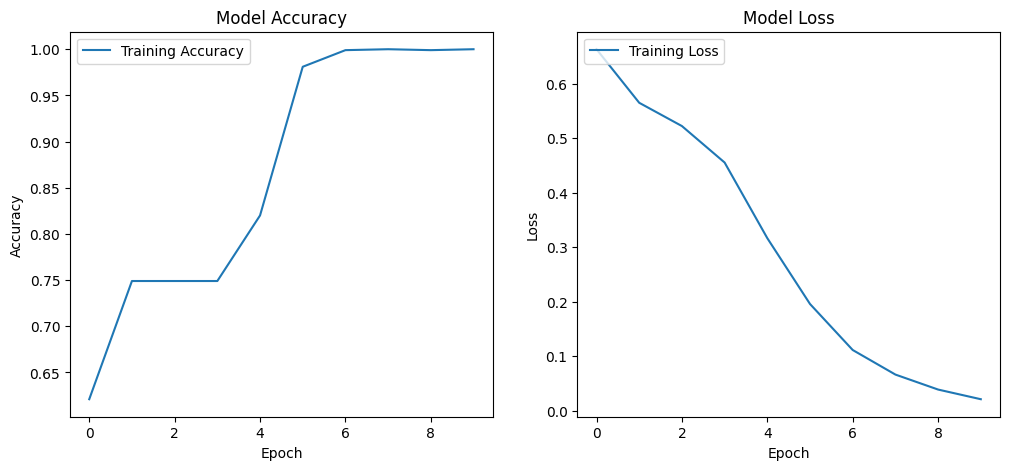

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Show the plots
plt.show()

In [ ]:
! pip uninstall torch transformers
! pip install torch transformers


Found existing installation: torch 2.3.0+cpu
Uninstalling torch-2.3.0+cpu:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/torch-2.3.0+cpu.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? y
  Successfully uninstalled torch-2.3.0+cpu
Found existing installation: transformers 4.42.4
Uninstalling transformers-4.42.4:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.10/dist-packages/transformers-4.42.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/transformers/*
Proceed (Y/n)? y
  Successfully uninstalled transformers-4.42.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 710.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 468.1 kB/s eta 0:00:00
   ━

In [ ]:
!pip install --upgrade torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 92.3 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.18.0+cpu
    Uninstalling torchvision-0.18.0+cpu:
      Successfully uninstalled torchvision-0.18.0+cpu
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.3.0+cpu
    Uninstalling torchaudio-2.3.0+cpu:
      Successfully uninstalled torchaudio-2.3.0+cpu


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save_pretrained('/content/drive/MyDrive/AI_text Detection/LLM AI Text_Detection finetuned')
tokenizer.save_pretrained('/content/drive/MyDrive/AI_text Detection/LLM AI Text_Detection finetuned')

NameError: name 'model' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/AI_text Detection/Training_Essay_Data.csv')
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['labels'],test_size=0.2,random_state=17)

In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/AI_text Detection/Training_Essay_Data.csv')

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['labels'], test_size=0.2, random_state=42)

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.config.output_hidden_states = True

# Sample input text for testing (using x_test and y_test)
texts = x_test.tolist()[:150]  # Use first 5 examples for testing

# Tokenize the text
def encode(texts, tokenizer, max_length=128):
    return tokenizer(texts, truncation=True, padding=True, max_length=max_length, return_tensors="tf")

X = encode(texts, tokenizer)

# Get the outputs from the model
outputs = model(X)

# Extract embeddings from BERT model
last_hidden_states = outputs.hidden_states[-1]

# Optional: You might want to average or pool the embeddings if you have multiple tokens.
# For example, average pooling across the tokens
embeddings = tf.reduce_mean(last_hidden_states, axis=1)

# Now 'embeddings' contains the contextual embeddings for your input text
print("Embeddings:")
print(embeddings)

# If you also want the predictions, you can still do that:
logits = outputs.logits  # Get the logits
predictions = tf.nn.softmax(logits, axis=1)  # Apply softmax to get probabilities
predicted_labels = tf.argmax(predictions, axis=1)  # Get the predicted label

# Print predictions
print("\nPredictions:")


Some layers from the model checkpoint at /content/drive/MyDrive/AI_text Detection/LLM AI Text_Detection finetuned were not used when initializing TFBertForSequenceClassification: ['dropout_113']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/AI_text Detection/LLM AI Text_Detection finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for pr

Embeddings:
tf.Tensor(
[[ 0.08597485  0.34089905  1.586905   ... -0.9487239   0.04433781
  -0.6437231 ]
 [-0.41321063  0.18794052  0.39727646 ... -0.31654742  0.0216553
   0.1181764 ]
 [-0.28536338  0.30340952  1.2722772  ... -0.69378936  0.19717564
  -0.17725733]
 ...
 [ 0.05474733  0.41203332  1.5868796  ... -0.87304735  0.15784465
  -0.59348094]
 [-0.2978174   0.35702598 -0.3964829  ... -0.0346507  -1.0515611
   0.09778576]
 [-0.26574254  0.3953672   0.97445214 ... -0.65999323  0.3280441
  -0.2495408 ]], shape=(150, 768), dtype=float32)

Predictions:


In [ ]:
print(predicted_labels.numpy())

[0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0
 1 0]


In [ ]:
y_pred=predicted_labels.numpy()
acc=accuracy_score(y_pred,y_test[:150])
print(acc)

0.8866666666666667


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
embeddings_2d=pca.fit_transform(embeddings)
print(embeddings)

tf.Tensor(
[[ 0.08597485  0.34089905  1.586905   ... -0.9487239   0.04433781
  -0.6437231 ]
 [-0.41321063  0.18794052  0.39727646 ... -0.31654742  0.0216553
   0.1181764 ]
 [-0.28536338  0.30340952  1.2722772  ... -0.69378936  0.19717564
  -0.17725733]
 ...
 [ 0.05474733  0.41203332  1.5868796  ... -0.87304735  0.15784465
  -0.59348094]
 [-0.2978174   0.35702598 -0.3964829  ... -0.0346507  -1.0515611
   0.09778576]
 [-0.26574254  0.3953672   0.97445214 ... -0.65999323  0.3280441
  -0.2495408 ]], shape=(150, 768), dtype=float32)


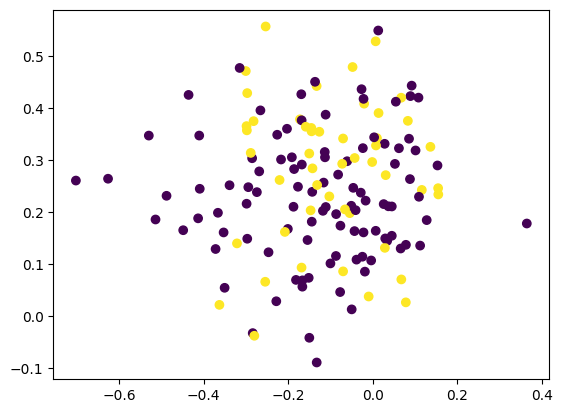

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(embeddings[:,0],embeddings[:,1],c=y_test[:150])
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
embeddings_3d=pca.fit_transform(embeddings)
print(embeddings)

tf.Tensor(
[[ 0.08597485  0.34089905  1.586905   ... -0.9487239   0.04433781
  -0.6437231 ]
 [-0.41321063  0.18794052  0.39727646 ... -0.31654742  0.0216553
   0.1181764 ]
 [-0.28536338  0.30340952  1.2722772  ... -0.69378936  0.19717564
  -0.17725733]
 ...
 [ 0.05474733  0.41203332  1.5868796  ... -0.87304735  0.15784465
  -0.59348094]
 [-0.2978174   0.35702598 -0.3964829  ... -0.0346507  -1.0515611
   0.09778576]
 [-0.26574254  0.3953672   0.97445214 ... -0.65999323  0.3280441
  -0.2495408 ]], shape=(150, 768), dtype=float32)


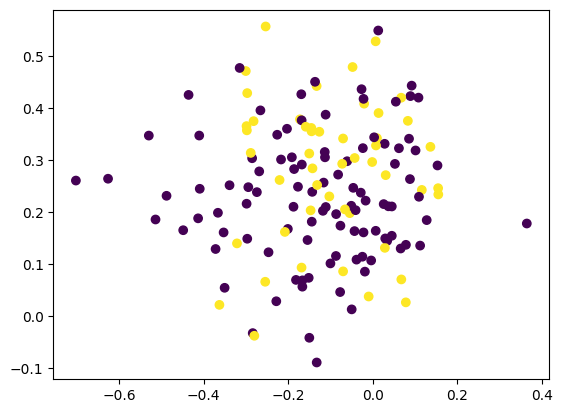

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(embeddings[:,0],embeddings[:,1],c=y_test[:150])
plt.show()

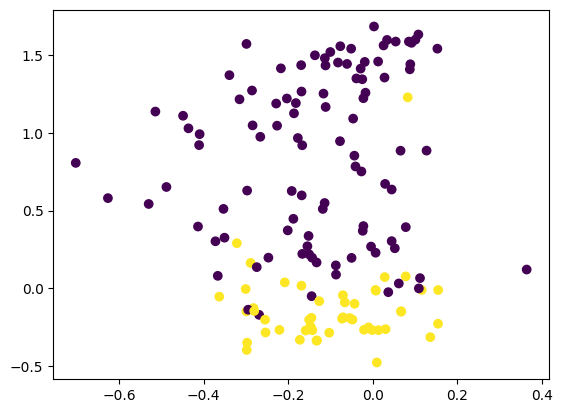

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(embeddings[:,0],embeddings[:,2],c=y_test[:150])
plt.show()

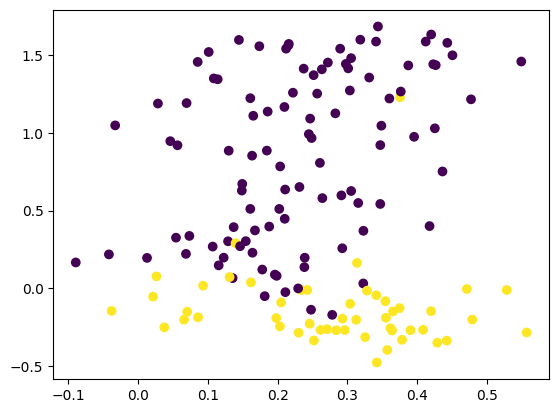

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(embeddings[:,1],embeddings[:,2],c=y_test[:150])
plt.show()

In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/AI_text Detection/Training_Essay_Data.csv')

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['labels'], test_size=0.2, random_state=42)

# Load the pre-trained BERT model and tokenizer
model_name = '/content/drive/MyDrive/AI_text Detection/LLM AI Text_Detection finetuned'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name)
model.config.output_hidden_states = True

# Sample input text for testing (using x_test and y_test)
texts = x_test.tolist()[:500]  # Use first 5 examples for testing

# Tokenize the text
def encode(texts, tokenizer, max_length=128):
    return tokenizer(texts, truncation=True, padding=True, max_length=max_length, return_tensors="tf")

X = encode(texts, tokenizer)

# Get the outputs from the model
outputs = model(X)

# Extract embeddings from BERT model
last_hidden_states = outputs.hidden_states[-1]

# Optional: You might want to average or pool the embeddings if you have multiple tokens.
# For example, average pooling across the tokens
embeddings = tf.reduce_mean(last_hidden_states, axis=1)

# Now 'embeddings' contains the contextual embeddings for your input text
print("Embeddings:")
print(embeddings)

# If you also want the predictions, you can still do that:
logits = outputs.logits  # Get the logits
predictions = tf.nn.softmax(logits, axis=1)  # Apply softmax to get probabilities
predicted_labels = tf.argmax(predictions, axis=1)  # Get the predicted label

# Print predictions
print("\nPredictions:")

Some layers from the model checkpoint at /content/drive/MyDrive/AI_text Detection/LLM AI Text_Detection finetuned were not used when initializing TFBertForSequenceClassification: ['dropout_113']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/AI_text Detection/LLM AI Text_Detection finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for pr

Embeddings:
tf.Tensor(
[[ 0.08597485  0.34089905  1.586905   ... -0.9487239   0.04433781
  -0.6437231 ]
 [-0.41321063  0.18794052  0.39727646 ... -0.31654742  0.0216553
   0.1181764 ]
 [-0.28536338  0.30340952  1.2722772  ... -0.69378936  0.19717564
  -0.17725733]
 ...
 [-0.4113605   0.4224345   0.47697204 ... -0.34505033  0.19710407
   0.12377496]
 [-0.26693094  0.10365454  0.6169692  ... -0.11964008  0.34343463
   0.03074036]
 [ 0.01536302  0.25216088 -0.27071452 ... -0.00270677 -0.7269304
   0.27007246]], shape=(500, 768), dtype=float32)

Predictions:


In [ ]:
print(predicted_labels.numpy())

[0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0
 0 1 0 1 1 1 1 0 0 1 1 1 

In [ ]:
y_pred=predicted_labels.numpy()
acc=accuracy_score(y_pred,y_test[:500])
print(acc)

0.922


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
embeddings_2d=pca.fit_transform(embeddings)
print(embeddings_2d)

[[-1.22200907e+01  5.98940792e+00]
 [-3.97689511e+00 -4.87137864e+00]
 [-9.93793194e+00  9.90460899e-01]
 [-1.24340525e+01  7.39034189e+00]
 [ 4.11835942e+00 -2.98414840e+00]
 [ 3.02765831e+00 -3.55640966e+00]
 [-1.13707435e+01  3.84547523e+00]
 [ 1.18913098e+01  2.32100779e+00]
 [ 9.42480055e+00  4.79455676e-01]
 [-8.40773744e+00 -1.30700141e+00]
 [ 9.65965530e-01 -4.89317895e+00]
 [ 1.08151152e+01  1.49557659e+00]
 [ 1.18200383e+01  2.20915057e+00]
 [-8.51423551e+00 -1.19351442e+00]
 [-6.04106092e+00 -2.92833898e+00]
 [ 8.57954338e+00 -4.80199730e-01]
 [-1.20484898e+01  5.72776931e+00]
 [ 7.58142770e+00 -1.40371260e+00]
 [-1.17904124e+01  5.37303785e+00]
 [-4.41977785e+00 -5.85812916e+00]
 [-5.05665947e+00 -4.03911445e+00]
 [ 2.14633036e+00 -4.47912836e+00]
 [-1.22271794e+01  6.00878822e+00]
 [-2.39081709e+00 -5.65268818e+00]
 [ 1.14279505e+01  3.19925649e+00]
 [ 1.12880688e+01  2.81293477e+00]
 [ 1.16301882e+01  1.81403181e+00]
 [ 1.20007644e+01  3.53388907e+00]
 [-1.22381844e+01  4

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
embeddings_scaled=scaler.fit_transform(embeddings_2d)

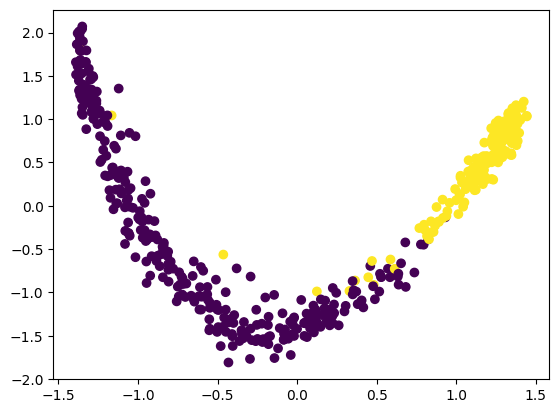

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(embeddings_scaled[:,0],embeddings_scaled[:,1],c=y_test[:500])
plt.show()

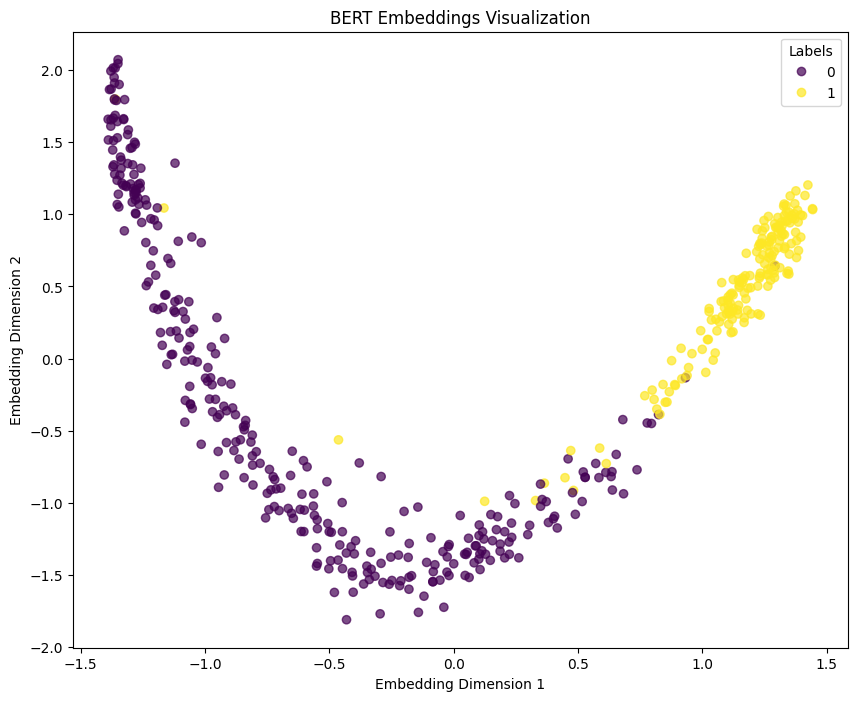

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_scaled[:, 0], embeddings_scaled[:, 1], c=y_test[:500], cmap='viridis', alpha=0.7)
legend1 = plt.legend(*scatter.legend_elements(), title="Labels")
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.title('BERT Embeddings Visualization')
plt.show()

TESTING


In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model_name = '/content/drive/MyDrive/AI_text Detection/LLM AI Text_Detection finetuned'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name)
model.config.output_hidden_states = True

Some layers from the model checkpoint at /content/drive/MyDrive/AI_text Detection/LLM AI Text_Detection finetuned were not used when initializing TFBertForSequenceClassification: ['dropout_113']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/AI_text Detection/LLM AI Text_Detection finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for pr

In [ ]:
def encode(texts, tokenizer, max_length=128):
    return tokenizer(texts, truncation=True, padding=True, max_length=max_length, return_tensors="tf")

In [ ]:
hgt=["Its BJP'S arrogance which took it down","Now no more questions are raised on the EVMs, fairness of the elections because the opposition is satisfied with the results. And yet, Modi is being termed as incumbent.Seriously?????","I don’t get the whole North South thing. Where does Maharashtra, Goa or Gujarat come in that equation? Goa is extremely rich state per capita and Gujarat and Maharashtra contribute more to the Indian GDP than the so called “South”. The whole North vs South is a manufactured divide.","It's a wake up call for BJP and Modiji for calling Rahul Gandhi pappu who is now LoP and will soon become PM"]

In [ ]:
mgt=["It's BJP's arrogance that brought about its downfall. They forgot that true leadership is about serving the people, not just holding power.","The opposition's sudden acceptance of election results conveniently overlooks their previous concerns about EVMs. But calling Modi the incumbent? The hypocrisy is astounding.","Why pit North against South when states like Maharashtra, Goa, and Gujarat are powerhouse economies in their own right? Let's not fall into the trap of divisive narratives and celebrate India's diversity and collective progress.","The BJP and Modi branding Rahul Gandhi as 'pappu' has backfired spectacularly. As the Leader of the Opposition and possibly the next Prime Minister, he has proven his political resilience. It's a lesson in not underestimating your rivals in the political arena."]

In [ ]:
len(hgt)

4

In [ ]:
len(mgt)

5

In [ ]:
hgt_tk=encode(hgt,tokenizer)
mgt_tk=encode(mgt,tokenizer)

In [ ]:
outputs = model(hgt_tk)

# Extract embeddings from BERT model
last_hidden_states = outputs.hidden_states[-1]

# Optional: You might want to average or pool the embeddings if you have multiple tokens.
# For example, average pooling across the tokens
embeddings_hgt = tf.reduce_mean(last_hidden_states, axis=1)

# Now 'embeddings' contains the contextual embeddings for your input text
print("Embeddings:")
print(embeddings_hgt)

# If you also want the predictions, you can still do that:
logits = outputs.logits  # Get the logits
predictions = tf.nn.softmax(logits, axis=1)  # Apply softmax to get probabilities
predicted_labels_hgt = tf.argmax(predictions, axis=1)  # Get the predicted label

# Print predictions
print("\nPredictions:",predicted_labels_hgt)

Embeddings:
tf.Tensor(
[[-0.3725744  -0.3428307  -0.07860593 ...  0.04767249  0.11650288
   0.18307431]
 [-0.30837214 -0.02058048  0.535788   ... -0.08661807  0.11196058
  -0.01554496]
 [-0.09040654 -0.17442293  0.19279476 ... -0.16192776  0.22980733
  -0.02242679]
 [-0.253711   -0.15820195  0.53250724 ... -0.05758077  0.0517088
  -0.2641295 ]], shape=(4, 768), dtype=float32)

Predictions: tf.Tensor([0 0 0 0], shape=(4,), dtype=int64)


In [ ]:
outputs = model(mgt_tk)

# Extract embeddings from BERT model
last_hidden_states = outputs.hidden_states[-1]

# Optional: You might want to average or pool the embeddings if you have multiple tokens.
# For example, average pooling across the tokens
embeddings_mgt = tf.reduce_mean(last_hidden_states, axis=1)

# Now 'embeddings' contains the contextual embeddings for your input text
print("Embeddings:")
print(embeddings_mgt)

# If you also want the predictions, you can still do that:
logits = outputs.logits  # Get the logits
predictions = tf.nn.softmax(logits, axis=1)  # Apply softmax to get probabilities
predicted_labels_mgt = tf.argmax(predictions, axis=1)  # Get the predicted label

# Print predictions
print("\nPredictions:",predicted_labels_mgt)

Embeddings:
tf.Tensor(
[[-0.15454556 -0.14369364 -0.06464013 ...  0.07235932 -0.24491997
   0.29594642]
 [-0.11001968  0.14202607  0.20220703 ...  0.34773722 -0.16022326
   0.24549364]
 [-0.03206826 -0.03671855 -0.15744795 ... -0.04024084 -0.3651497
  -0.06460084]
 [-0.24579266 -0.16909346 -0.01604954 ...  0.12979165 -0.32481655
  -0.11484284]], shape=(4, 768), dtype=float32)

Predictions: tf.Tensor([1 1 1 1], shape=(4,), dtype=int64)


In [ ]:
embeddings=tf.concat([embeddings_hgt,embeddings_mgt],axis=0)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
embeddings_2d=pca.fit_transform(embeddings)
print(embeddings_2d)

[[-2.40322174  3.80999134]
 [-5.39929748 -0.49381125]
 [-1.18961972 -2.45960141]
 [-6.87166128 -1.58719534]
 [ 2.66167474  1.97834012]
 [ 1.62055156  1.39631398]
 [ 7.35805257 -1.18167179]
 [ 4.22352136 -1.46236564]]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
embeddings_scaled=scaler.fit_transform(embeddings_2d)

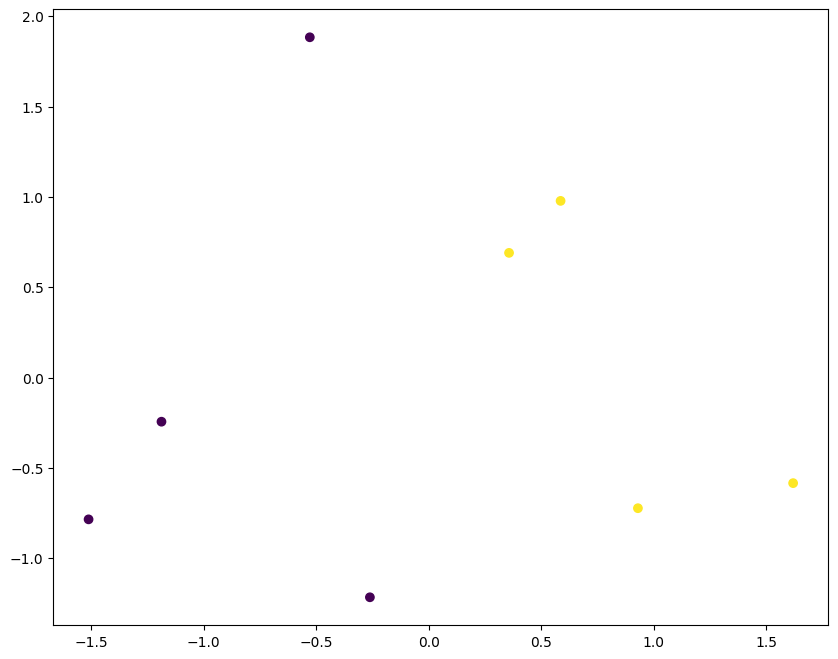

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_scaled[:,0],embeddings_scaled[:,1],c=[0,0,0,0,1,1,1,1])
plt.show()

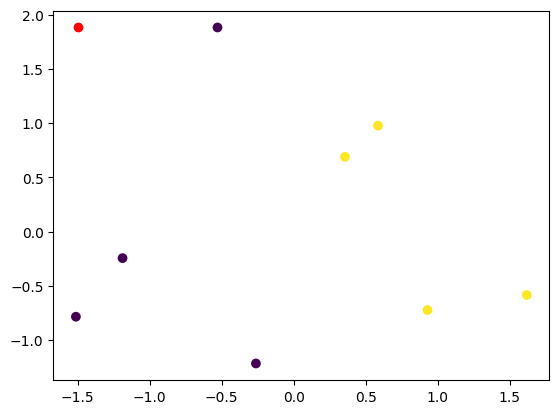

In [ ]:
plt.scatter(embeddings_scaled[:,0],embeddings_scaled[:,1],c=[0,0,0,0,1,1,1,1])
plt.scatter(embeddings_sample_2d_scaled[0,0],embeddings_scaled[0,1],c='red')
plt.show()

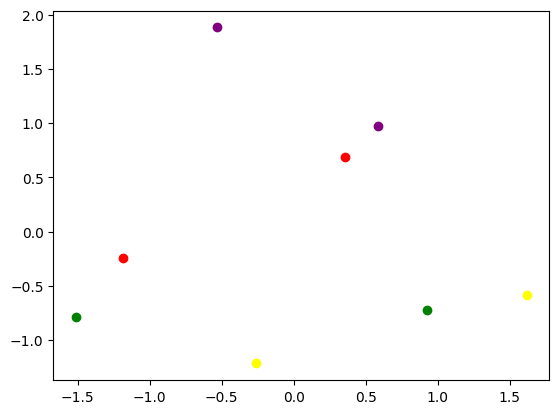

In [ ]:
plt.scatter(embeddings_scaled[0,0],embeddings_scaled[0,1],c='purple')
plt.scatter(embeddings_scaled[4,0],embeddings_scaled[4,1],c='purple')
plt.scatter(embeddings_scaled[1,0],embeddings_scaled[1,1],c='red')
plt.scatter(embeddings_scaled[5,0],embeddings_scaled[5,1],c='red')
plt.scatter(embeddings_scaled[2,0],embeddings_scaled[2,1],c='yellow')
plt.scatter(embeddings_scaled[6,0],embeddings_scaled[6,1],c='yellow')
plt.scatter(embeddings_scaled[3,0],embeddings_scaled[3,1],c='green')
plt.scatter(embeddings_scaled[7,0],embeddings_scaled[7,1],c='green')
plt.show()

In [ ]:
sample_text=["The BJP's mocking of Rahul Gandhi as 'pappu' now seems shortsighted. As the Leader of the Opposition and a potential future PM, he has emerged as a formidable force in Indian politics. It's a clear reminder of the volatility and unpredictability of political dynamics.","The BJP's dismissive 'pappu' tag for Rahul Gandhi is now coming back to haunt them. As the new Leader of the Opposition and a rising political figure, he commands significant influence. It serves as a cautionary tale against underestimating opponents in politics.","The BJP's ridicule of Rahul Gandhi as 'pappu' appears to have underestimated his political acumen. Now, as the Leader of the Opposition and a potential PM, he stands as a formidable challenger. It underscores the volatility of political fortunes and the need for careful political strategy.","Calling Rahul Gandhi 'pappu' was a strategic misstep for BJP and Modi. As the Leader of the Opposition and a prospective Prime Minister, he has garnered widespread support. It highlights the importance of respectful discourse in political rivalries."

"The BJP's ridicule of Rahul Gandhi as 'pappu' appears to have underestimated his political acumen. Now, as the Leader of the Opposition and a potential PM, he stands as a formidable challenger. It underscores the volatility of political fortunes and the need for careful political strategy.","Calling Rahul Gandhi 'pappu' now seems like a miscalculation for BJP and Modi. As the Leader of the Opposition and potentially the future Prime Minister, his political stature is undeniable. It's a reminder that underestimating your opponent can have significant consequences in politics."
]
sample_tk=encode(sample_text,tokenizer)
outputs = model(sample_tk)

# Extract embeddings from BERT model
last_hidden_states = outputs.hidden_states[-1]

# Optional: You might want to average or pool the embeddings if you have multiple tokens.
# For example, average pooling across the tokens
embeddings_sample = tf.reduce_mean(last_hidden_states, axis=1)

# Now 'embeddings' contains the contextual embeddings for your input text
print("Embeddings:")
print(embeddings_sample)

# If you also want the predictions, you can still do that:
logits = outputs.logits  # Get the logits
predictions = tf.nn.softmax(logits, axis=1)  # Apply softmax to get probabilities
predicted_labels_sample = tf.argmax(predictions, axis=1)  # Get the predicted label

# Print predictions
print("\nPredictions:",predicted_labels_sample)

Embeddings:
tf.Tensor(
[[-4.0541914e-01 -7.6674081e-02 -1.5185001e-01 ...  1.8862723e-01
  -5.9447587e-01  1.7219046e-01]
 [-1.9915126e-01  3.5649915e-03  3.0433476e-02 ...  2.5363478e-01
  -5.1704580e-01  7.2263703e-02]
 [-5.3470767e-01 -5.7947148e-02 -1.5699217e-01 ...  9.8603822e-02
  -6.3686734e-01  1.2073065e-01]
 [-5.6653601e-01 -2.5899228e-02 -3.1930834e-01 ...  1.1840515e-01
  -8.0465353e-01  4.2006670e-04]
 [-1.5775397e-01  1.0154935e-02  3.1412657e-02 ...  1.9385006e-01
  -3.2531109e-01  1.2352821e-01]], shape=(5, 768), dtype=float32)

Predictions: tf.Tensor([1 1 1 1 1], shape=(5,), dtype=int64)


In [ ]:
embeddings_sample_2d=pca.transform(embeddings_sample)
embeddings_sample_2d_scaled=scaler.transform(embeddings_sample_2d)
print(embeddings_sample_2d_scaled)

[[ 1.23408373  0.1885674 ]
 [ 1.13853283  0.23947232]
 [ 1.35348078  0.07705233]
 [ 1.98904296 -0.72602335]
 [ 0.60706627  0.09569974]]


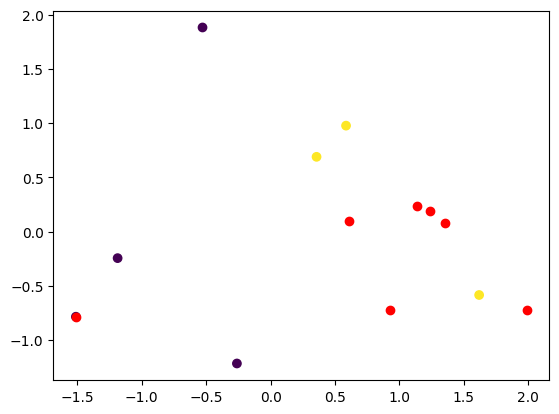

In [ ]:
plt.scatter(embeddings_sample_2d_scaled[:,0],embeddings_sample_2d_scaled[:,1],c='red')
plt.scatter(embeddings_scaled[7,0],embeddings_scaled[7,1],c='red')
plt.scatter(embeddings_scaled[:7,0],embeddings_scaled[:7,1],c=[0,0,0,0,1,1,1])
plt.scatter(embeddings_scaled[3,0],embeddings_scaled[3,1],c='red')
plt.show()

In [ ]:
sample_text=["Ha! That would be hilarious. Tekkz schooling someone completely new to the competitive scene    Could you imagine the skill gap?  It would be a fun way to see Tekkz have to explain the mechanics in a whole new light.  Maybe Speed could even surprise us with some hidden talent!  #TekkzsBootcamp  #SpeedUpThePace"]
sample_tk=encode(sample_text,tokenizer)
outputs = model(sample_tk)

# Extract embeddings from BERT model
last_hidden_states = outputs.hidden_states[-1]

# Optional: You might want to average or pool the embeddings if you have multiple tokens.
# For example, average pooling across the tokens
embeddings_sample = tf.reduce_mean(last_hidden_states, axis=1)

# Now 'embeddings' contains the contextual embeddings for your input text

# If you also want the predictions, you can still do that:
logits = outputs.logits  # Get the logits
predictions = tf.nn.softmax(logits, axis=1)  # Apply softmax to get probabilities
predicted_labels_sample = tf.argmax(predictions, axis=1)  # Get the predicted label

# Print predictions
print("\nPredictions:",predicted_labels_sample)


Predictions: tf.Tensor([0], shape=(1,), dtype=int64)


In [ ]:
embeddings_sample_2d=pca.transform(embeddings_sample)
embeddings_sample_2d_scaled=scaler.transform(embeddings_sample_2d)
print(embeddings_sample_2d_scaled)

[[-1.49861887 -1.5603747 ]]


In [ ]:
string1 = "Python"
string2 = "Programming"
result = string1 + " " + string2

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Initialize the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Tokenize input text
input_text = "Once upon a time"
inputs = tokenizer(input_text, return_tensors='pt')

# Generate text
outputs = model.generate(inputs['input_ids'], max_length=100, num_return_sequences=1)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a


In [ ]:
outputs = model.generate(inputs['input_ids'], max_length=20, num_return_sequences=1)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, the world was a place of great beauty and great danger. The world was


In [ ]:
outputs = model.generate(inputs['input_ids'], attention_mask=inputs.get('attention_mask', None), max_length=50, num_return_sequences=1)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)
print(outputs)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a
tensor([[7454, 2402,  257,  640,   11,  262,  995,  373,  257, 1295,  286, 1049,
         8737,  290, 1049, 3514,   13,  383,  995,  373,  257, 1295,  286, 1049,
         3514,   11,  290,  262,  995,  373,  257, 1295,  286, 1049, 3514,   13,
          383,  995,  373,  257, 1295,  286, 1049, 3514,   11,  290,  262,  995,
          373,  257]])


In [ ]:
outputs.shape

torch.Size([1, 50])

In [ ]:
import spacy
from transformers import MarianMTModel, MarianTokenizer

# Function to ensure the spaCy model is downloaded
def load_spacy_model():
    try:
        nlp = spacy.load('es_core_news_sm')
    except OSError:
        print("Downloading spaCy's Spanish model...")
        spacy.cli.download('es_core_news_sm')
        nlp = spacy.load('es_core_news_sm')
    return nlp

# Load spaCy model
nlp = load_spacy_model()

# Load pre-trained translation model and tokenizer
model_name = 'Helsinki-NLP/opus-mt-en-es'
tokenizer = MarianTokenizer.from_pretrained(model_name)
translation_model = MarianMTModel.from_pretrained(model_name)

def translate_and_analyze(text):
    # Step 1: Translate English to Spanish
    inputs = tokenizer(text, return_tensors="pt", padding=True)
    translated_tokens = translation_model.generate(**inputs)
    translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)

    # Step 2: Perform grammatical analysis on the translated text
    doc = nlp(translated_text)

    # Step 3: Extract grammatical information
    analysis = []
    for token in doc:
        analysis.append({
            'text': token.text,
            'lemma': token.lemma_,
            'pos': token.pos_,
            'tag': token.tag_,
            'dep': token.dep_,
            'head': token.head.text
        })

    return translated_text, analysis

# Example usage
english_text = "The quick brown fox jumps over the lazy dog."
spanish_translation, grammar_analysis = translate_and_analyze(english_text)

print(f"Translation: {spanish_translation}")
print("Grammatical Structure:")
for word_info in grammar_analysis:
    print(word_info)

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Translation: El zorro marrón salta sobre el perro perezoso.
Grammatical Structure:
{'text': 'El', 'lemma': 'el', 'pos': 'DET', 'tag': 'DET', 'dep': 'det', 'head': 'zorro'}
{'text': 'zorro', 'lemma': 'zorro', 'pos': 'NOUN', 'tag': 'NOUN', 'dep': 'ROOT', 'head': 'zorro'}
{'text': 'marrón', 'lemma': 'marrón', 'pos': 'ADJ', 'tag': 'ADJ', 'dep': 'amod', 'head': 'zorro'}
{'text': 'salta', 'lemma': 'salta', 'pos': 'PROPN', 'tag': 'PROPN', 'dep': 'appos', 'head': 'zorro'}
{'text': 'sobre', 'lemma': 'sobre', 'pos': 'ADP', 'tag': 'ADP', 'dep': 'case', 'head': 'perro'}
{'text': 'el', 'lemma': 'el', 'pos': 'DET', 'tag': 'DET', 'dep': 'det', 'head': 'perro'}
{'text': 

In [ ]:
python -m spacy download es_core_news_sm

SyntaxError: invalid syntax (<ipython-input-2-05597d53c2bd>, line 1)